In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('../validation/aggregate_results/aggregate_validation_results.csv')
df.dropna(inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,UTM_E,UTM_N,MagnaProbe Depth [m],geometry,Raster Value [m],Probe-Raster Delta [m],Raster Value Corrected [m],Year,Study Area
0,0,0,422637.925658,7.674614e+06,0.3410,POINT (422637.92565783 7674614.289540267),0.436340,-0.095340,0.356340,2018,Happy Valley
1,1,1,422636.925775,7.674616e+06,0.3232,POINT (422636.9257748795 7674616.18459558),0.520660,-0.197460,0.440660,2018,Happy Valley
2,2,2,422636.600034,7.674618e+06,0.4831,POINT (422636.6000335729 7674618.426386847),0.569305,-0.086205,0.489305,2018,Happy Valley
3,3,3,422636.272506,7.674619e+06,0.4926,POINT (422636.2725060719 7674618.615322301),0.569305,-0.076705,0.489305,2018,Happy Valley
4,4,4,422636.982464,7.674620e+06,0.6242,POINT (422636.9824642739 7674620.087788817),0.609161,0.015039,0.529161,2018,Happy Valley


In [64]:
err = df['Probe-Raster Delta [m]'].abs().astype('float32')
err.all().plot()

AttributeError: 'numpy.bool_' object has no attribute 'plot'

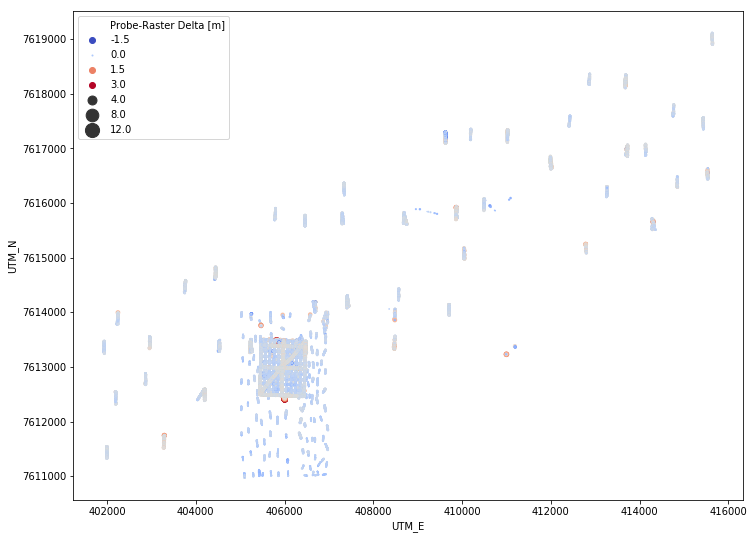

In [84]:
f, ax = plt.subplots(figsize=(12, 9))

clpx = df[df['Study Area'] == 'CLPX']

sns.scatterplot(x="UTM_E", y="UTM_N",
                hue="Probe-Raster Delta [m]",
                palette="coolwarm",
                size=err, sizes=(1, 200), size_norm=(0,10), linewidth=0,
                data=clpx, ax=ax)


In [45]:
type(clpx.err.values[0])

numpy.float64

In [43]:
clpx.err

51020     0.206696
51021     0.234996
51022     0.219091
51023     0.308510
51024     0.568126
51025     0.551880
51026     0.537303
51027     0.567871
51028     0.573486
51029     0.567505
51030     0.574890
51031     0.590342
51032     0.590342
51033     0.606262
51034     0.625244
51035     0.612488
51036     0.556396
51037     0.588511
51038     0.602234
51039     0.564270
51040     0.311730
51041     0.322603
51042     0.346294
51043     0.547668
51044     0.247571
51045     0.344300
51046     0.264383
51047     0.550903
51048     0.515991
51049     0.484080
            ...   
141177    0.442975
141178    0.425761
141179    0.430188
141180    0.513841
141181    0.381408
141182    0.433580
141183    0.445255
141184    0.361569
141185    0.519577
141186    0.452877
141187    0.479659
141188    0.504946
141189    0.416217
141190    0.460535
141191    0.480890
141192    0.506484
141193    0.504564
141194    0.502718
141195    0.420483
141196    0.390870
141197    0.461542
141198    0.